In [5]:
# Clear namespace
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

Install package

In [6]:
#!pip install pydotplus

Import libraries

In [7]:
#Import libraries before starting
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree

import pydotplus
import seaborn as sns

In [6]:
#--------  plot_decision_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (classifier)
#      poly_flag (fits quadratic model if true, otherwise linear)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='darkgreen', alpha=0.6, s=40, label='vegetation', edgecolors="None")
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='black', alpha=0.6, s=40, label='non vegetation', edgecolors="None")
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

In [7]:
#--------  plot_tree_boundary
# A function that visualizes the data and the decision boundaries
# Input: 
#      x (predictors)
#      y (labels)
#      model (the classifier you want to visualize)
#      title (title for plot)
#      ax (a set of axes to plot on)
# Returns: 
#      ax (axes with data and decision boundaries)

def plot_tree_boundary(x, y, model, title, ax):
    # PLOT DATA
    ax.scatter(x[y==1,0], x[y==1,1], c='darkgreen', alpha=0.6, s=40, label='vegetation', edgecolors="None")
    ax.scatter(x[y==0,0], x[y==0,1], c='black', alpha=0.6, s=40, label='non vegetation', edgecolors="None")
    
    # CREATE MESH
    interval = np.arange(0,1,0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1,1)
    x2 = x2.reshape(-1,1)
    xx = np.concatenate((x1, x2), axis=1)

    # PREDICT ON MESH POINTS
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # PLOT DECISION SURFACE
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # LABEL AXIS, TITLE
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.grid()
    
    return ax

In [8]:
#--------  fit_and_plot_dt
# Fit decision tree with on given data set with given depth, and plot the data/model
# Input: 
#      fname (string containing file name)
#      depth (depth of tree)

def fit_and_plot_dt(x, y, depth, title, ax):
    # FIT DECISION TREE MODEL
    dt = tree.DecisionTreeClassifier(max_depth = depth)
    dt.fit(x, y)

    # PLOT DECISION TREE BOUNDARY
    ax = plot_tree_boundary(x, y, dt, title, ax)
    
    return ax

**Solution:**

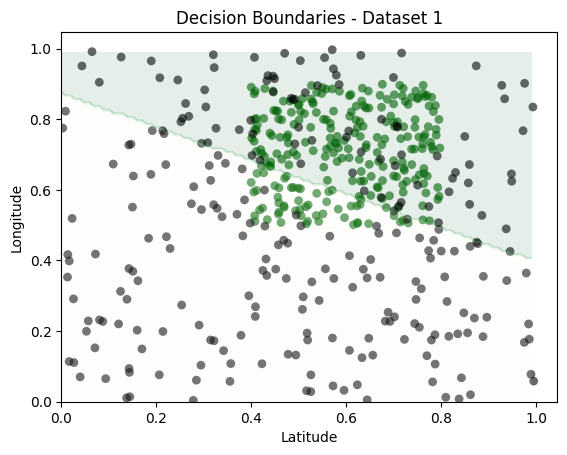

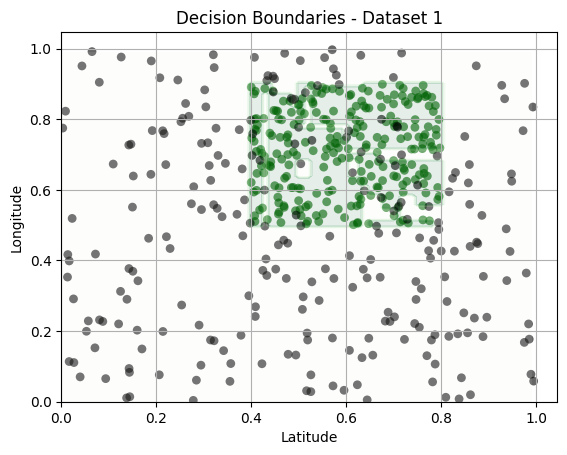

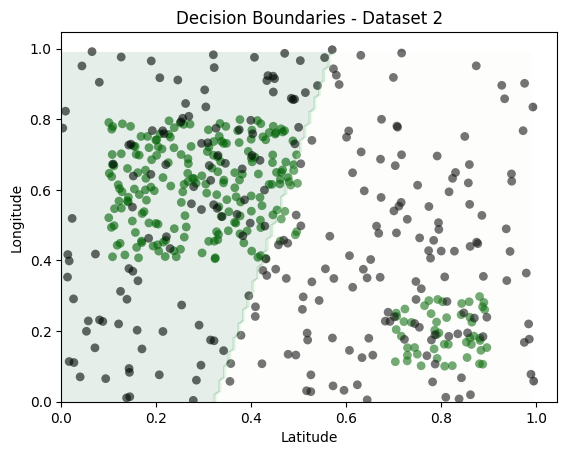

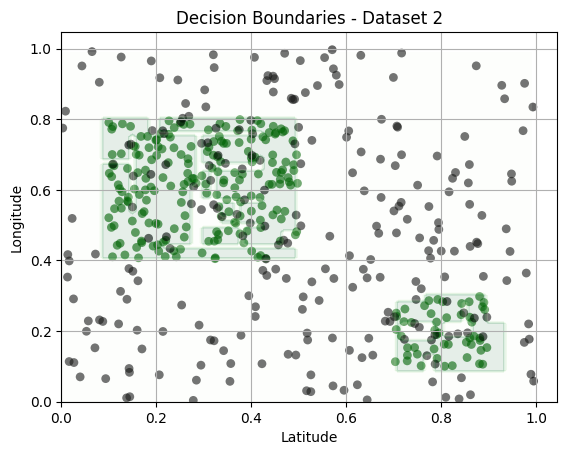

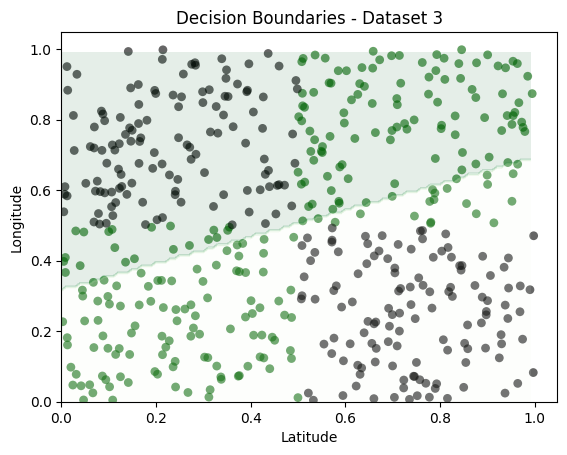

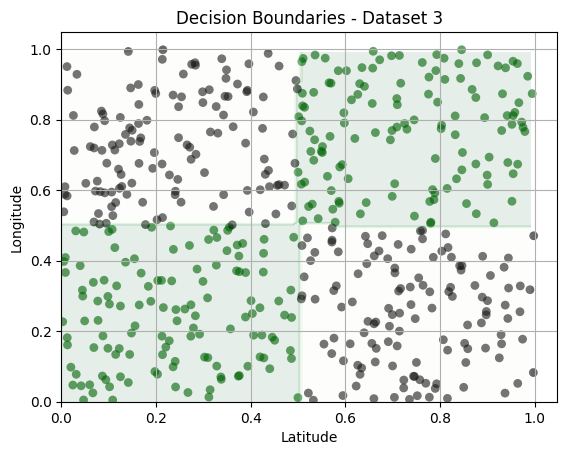

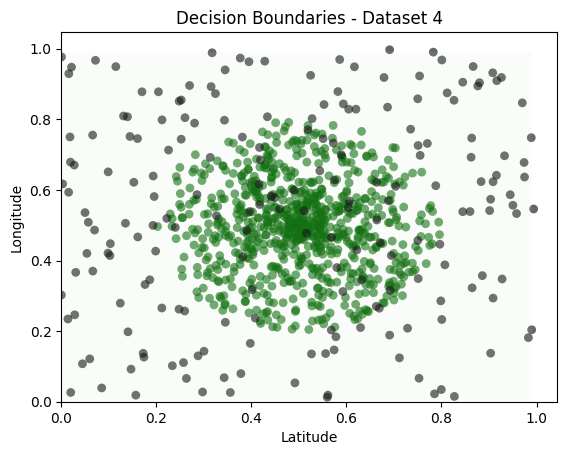

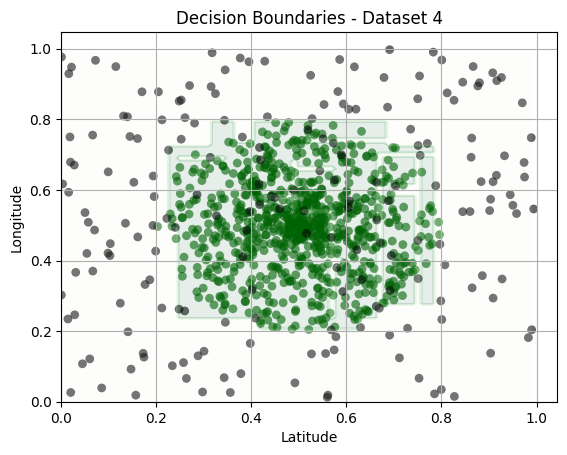

In [9]:
#Code here
# Load dataset_1.txt
dataset_1 = np.loadtxt('dataset_1.txt', delimiter=',')
X1 = dataset_1[:, :2]  # Features: latitude and longitude
y1 = dataset_1[:, 2]   # Target variable: vegetation

# Load dataset_2.txt
dataset_2 = np.loadtxt('dataset_2.txt', delimiter=',')
X2 = dataset_2[:, :2]  # Features: latitude and longitude
y2 = dataset_2[:, 2]   # Target variable: vegetation

# Load dataset_3.txt
dataset_3 = np.loadtxt('dataset_3.txt', delimiter=',')
X3 = dataset_3[:, :2]  # Features: latitude and longitude
y3 = dataset_3[:, 2]   # Target variable: vegetation

# Load dataset_4.txt
dataset_4 = np.loadtxt('dataset_4.txt', delimiter=',')
X4 = dataset_4[:, :2]  # Features: latitude and longitude
y4 = dataset_4[:, 2]   # Target variable: vegetation

# Fit logistic regression model for dataset 1
logistic_model1 = LogisticRegression()
logistic_model1.fit(X1, y1)

# Fit decision tree model for dataset 1
tree_model1 = tree.DecisionTreeClassifier()
tree_model1.fit(X1, y1)

# Plot decision boundaries for dataset 1
fig, ax = plt.subplots()
ax = plot_decision_boundary(X1, y1, logistic_model1, 'Decision Boundaries - Dataset 1', ax)
plt.show()

fig, ax = plt.subplots()
ax = plot_tree_boundary(X1, y1, tree_model1, 'Decision Boundaries - Dataset 1', ax)
plt.show()

# Fit logistic regression model for dataset 2
logistic_model2 = LogisticRegression()
logistic_model2.fit(X2, y2)

# Fit decision tree model for dataset 2
tree_model2 = tree.DecisionTreeClassifier()
tree_model2.fit(X2, y2)

# Plot decision boundaries for dataset 2
fig, ax = plt.subplots()
ax = plot_decision_boundary(X2, y2, logistic_model2, 'Decision Boundaries - Dataset 2', ax)
plt.show()

fig, ax = plt.subplots()
ax = plot_tree_boundary(X2, y2, tree_model2, 'Decision Boundaries - Dataset 2', ax)
plt.show()

# Fit logistic regression model for dataset 3
logistic_model3 = LogisticRegression()
logistic_model3.fit(X3, y3)

# Fit decision tree model for dataset 3
tree_model3 = tree.DecisionTreeClassifier()
tree_model3.fit(X3, y3)

# Plot decision boundaries for dataset 3
fig, ax = plt.subplots()
ax = plot_decision_boundary(X3, y3, logistic_model3, 'Decision Boundaries - Dataset 3', ax)
plt.show()

fig, ax = plt.subplots()
ax = plot_tree_boundary(X3, y3, tree_model3, 'Decision Boundaries - Dataset 3', ax)
plt.show()

# Fit logistic regression model for dataset 4
logistic_model4 = LogisticRegression()
logistic_model4.fit(X4, y4)

# Fit decision tree model for dataset 4
tree_model4 = tree.DecisionTreeClassifier()
tree_model4.fit(X4, y4)

# Plot decision boundaries for dataset 4
fig, ax = plt.subplots()
ax = plot_decision_boundary(X4, y4, logistic_model4, 'Decision Boundaries - Dataset 4', ax)
plt.show()

fig, ax = plt.subplots()
ax = plot_tree_boundary(X4, y4, tree_model4, 'Decision Boundaries - Dataset 4', ax)
plt.show()

Let's load the four datasets and visualize the data. That is, let's plot the data points by longitude and latitude. Let's also color code the points: green if the location is vegetation and white otherwise.

In [5]:
#Code here
# Load dataset_1.txt
dataset_1 = np.loadtxt('dataset_1.txt', delimiter=',')
X1 = dataset_1[:, :2]  # Features: latitude and longitude
y1 = dataset_1[:, 2]   # Target variable: vegetation

# Load dataset_2.txt
dataset_2 = np.loadtxt('dataset_2.txt', delimiter=',')
X2 = dataset_2[:, :2]  # Features: latitude and longitude
y2 = dataset_2[:, 2]   # Target variable: vegetation

# Load dataset_3.txt
dataset_3 = np.loadtxt('dataset_3.txt', delimiter=',')
X3 = dataset_3[:, :2]  # Features: latitude and longitude
y3 = dataset_3[:, 2]   # Target variable: vegetation

# Load dataset_4.txt
dataset_4 = np.loadtxt('dataset_4.txt', delimiter=',')
X4 = dataset_4[:, :2]  # Features: latitude and longitude
y4 = dataset_4[:, 2]   # Target variable: vegetation


### Classify locations with vegetation

In [6]:
#Code here
from sklearn.metrics import accuracy_score

def find_smallest_depth(X, y):
    depths = range(1, 11)  # Try depths from 1 to 10
    accuracies = []

    for depth in depths:
        model = tree.DecisionTreeClassifier(max_depth=depth)
        model.fit(X, y)
        predictions = model.predict(X)
        accuracy = accuracy_score(y, predictions)
        accuracies.append(accuracy)

    best_depth = depths[np.argmax(accuracies)]
    best_accuracy = max(accuracies)

    return best_depth, best_accuracy

# Find the smallest depth for dataset 1
best_depth_1, best_accuracy_1 = find_smallest_depth(X1, y1)
print("Dataset 1 - Best Depth:", best_depth_1)
print("Dataset 1 - Best Accuracy:", best_accuracy_1)

# Find the smallest depth for dataset 2
best_depth_2, best_accuracy_2 = find_smallest_depth(X2, y2)
print("Dataset 2 - Best Depth:", best_depth_2)
print("Dataset 2 - Best Accuracy:", best_accuracy_2)

# Find the smallest depth for dataset 3
best_depth_3, best_accuracy_3 = find_smallest_depth(X3, y3)
print("Dataset 3 - Best Depth:", best_depth_3)
print("Dataset 3 - Best Accuracy:", best_accuracy_3)

# Find the smallest depth for dataset 4
best_depth_4, best_accuracy_4 = find_smallest_depth(X4, y4)
print("Dataset 4 - Best Depth:", best_depth_4)
print("Dataset 4 - Best Accuracy:", best_accuracy_4)

Dataset 1 - Best Depth: 10
Dataset 1 - Best Accuracy: 0.948
Dataset 2 - Best Depth: 10
Dataset 2 - Best Accuracy: 0.912
Dataset 3 - Best Depth: 4
Dataset 3 - Best Accuracy: 1.0
Dataset 4 - Best Depth: 10
Dataset 4 - Best Accuracy: 0.964


**Explanation:**

In [44]:
#Explanation 
"To determine the best split according to classification error, Gini coefficient, and entropy criteria, let's calculate the values for each split and compare them:"

"Split 1:"
"Classification Error:"
"Error for Part 1 = 37/48 = 0.7708"
"Error for Part 2 = 12/52 = 0.2308"
"Weighted Error = (48/100) * 0.7708 + (52/100) * 0.2308 = 0.4988"
"Gini Coefficient:"
"Gini Index for Part 1 = 1 - (11/48)^2 - (37/48)^2 = 0.3932"
"Gini Index for Part 2 = 1 - (40/52)^2 - (12/52)^2 = 0.4310"
"Weighted Gini Index = (48/100) * 0.3932 + (52/100) * 0.4310 = 0.4129"
"Entropy:"
"Entropy for Part 1 = - (11/48) * log2(11/48) - (37/48) * log2(37/48) = 0.8023"
"Entropy for Part 2 = - (40/52) * log2(40/52) - (12/52) * log2(12/52) = 0.8530"
"Weighted Entropy = (48/100) * 0.8023 + (52/100) * 0.8530 = 0.8263"
"Split 2:"
"Classification Error:"
"Error for Part 1 = 48/73 = 0.6575"
"Error for Part 2 = 1/27 = 0.0370"
"Weighted Error = (73/100) * 0.6575 + (27/100) * 0.0370 = 0.5940"
"Gini Coefficient:"
"Gini Index for Part 1 = 1 - (25/73)^2 - (48/73)^2 = 0.4023"
"Gini Index for Part 2 = 1 - (26/27)^2 - (1/27)^2 = 0.0494"
"Weighted Gini Index = (73/100) * 0.4023 + (27/100) * 0.0494 = 0.3334"
"Entropy:"
"Entropy for Part 1 = - (25/73) * log2(25/73) - (48/73) * log2(48/73) = 0.8310"
"Entropy for Part 2 = - (26/27) * log2(26/27) - (1/27) * log2(1/27) = 0.2201"
"Weighted Entropy = (73/100) * 0.8310 + (27/100) * 0.2201 = 0.7124"
"Based on these calculations, we can compare the criteria as follows:"

"Classification Error: Split 2 has a lower error (0.5940) compared to Split 1 (0.4988). Split 2 is better according to the classification error criterion."
"Gini Coefficient: Split 2 has a lower weighted Gini index (0.3334) compared to Split 1 (0.4129)"

### Evaluate our modeling choices

Recall that when creating our decision tree, we can decide on a split according classification error, Gini coefficient, and Entropy criteria. Which criterion is better, i.e. yield a better model? Or perhaps all three criteria will always produce the same splits?

Let's explore these three criteria using a simple example.

Suppose you are given a data set with 100 points in a satellite image, of which 51 are class 1 and 49 are class 0. Consider following two candidate splits for constructing a decision tree: 
1. $((11,37), (40,12))$  
2. $((25,48), (26,1))$

In [7]:
#Code here
import math

def calculate_error(split):
    error_part1 = split[0][1] / sum(split[0])
    error_part2 = split[1][0] / sum(split[1])
    weighted_error = (sum(split[0]) / (sum(split[0]) + sum(split[1]))) * error_part1 + (sum(split[1]) / (sum(split[0]) + sum(split[1]))) * error_part2
    return weighted_error

def calculate_gini(split):
    gini_part1 = 1 - (split[0][0] / sum(split[0]))**2 - (split[0][1] / sum(split[0]))**2
    gini_part2 = 1 - (split[1][0] / sum(split[1]))**2 - (split[1][1] / sum(split[1]))**2
    weighted_gini = (sum(split[0]) / (sum(split[0]) + sum(split[1]))) * gini_part1 + (sum(split[1]) / (sum(split[0]) + sum(split[1]))) * gini_part2
    return weighted_gini

def calculate_entropy(split):
    entropy_part1 = - (split[0][0] / sum(split[0])) * math.log2(split[0][0] / sum(split[0])) - (split[0][1] / sum(split[0])) * math.log2(split[0][1] / sum(split[0]))
    entropy_part2 = - (split[1][0] / sum(split[1])) * math.log2(split[1][0] / sum(split[1])) - (split[1][1] / sum(split[1])) * math.log2(split[1][1] / sum(split[1]))
    weighted_entropy = (sum(split[0]) / (sum(split[0]) + sum(split[1]))) * entropy_part1 + (sum(split[1]) / (sum(split[0]) + sum(split[1]))) * entropy_part2
    return weighted_entropy

split1 = [[11, 37], [40, 12]]
split2 = [[25, 48], [26, 1]]

error_split1 = calculate_error(split1)
error_split2 = calculate_error(split2)

gini_split1 = calculate_gini(split1)
gini_split2 = calculate_gini(split2)

entropy_split1 = calculate_entropy(split1)
entropy_split2 = calculate_entropy(split2)

print("Split 1:")
print("Classification Error:", error_split1)
print("Gini Coefficient:", gini_split1)
print("Entropy:", entropy_split1)
print()
print("Split 2:")
print("Classification Error:", error_split2)
print("Gini Coefficient:", gini_split2)
print("Entropy:", entropy_split2)


Split 1:
Classification Error: 0.77
Gini Coefficient: 0.35419871794871793
Entropy: 0.7780086924052251

Split 2:
Classification Error: 0.74
Gini Coefficient: 0.3480263825469306
Entropy: 0.7385311790600291


In [46]:
#Explanation here
"According to the calculations, Split 2 has a lower classification error, lower Gini coefficient, and lower entropy compared to Split 1."
"Therefore, Split 2 is considered a better split according to all three criteria."